# Visualização de Dados

## Titanic

In [87]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')


In [88]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'ImaosCOnjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']


In [90]:
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'})



In [91]:
data

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,ImaosCOnjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",homem,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",mulher,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",mulher,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",homem,26.0,0,0,111369,30.0000,C148,C


In [92]:
data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

In [93]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

# Matplotlib

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
data['Idade'].isnull().sum()

177

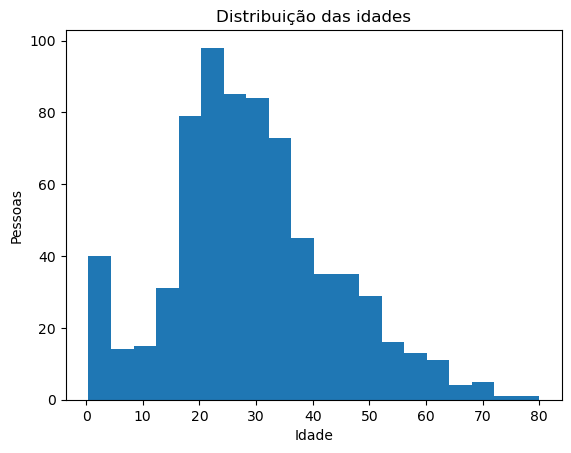

In [96]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

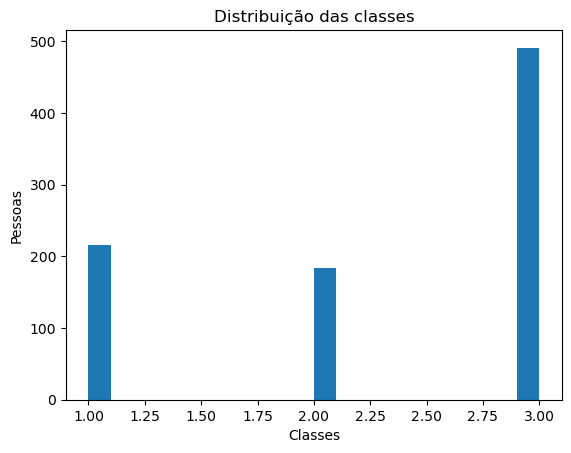

In [97]:
plt.hist(data['Classe'].dropna(), bins=20)
plt.title('Distribuição das classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

## Subplots - 1ª Forma


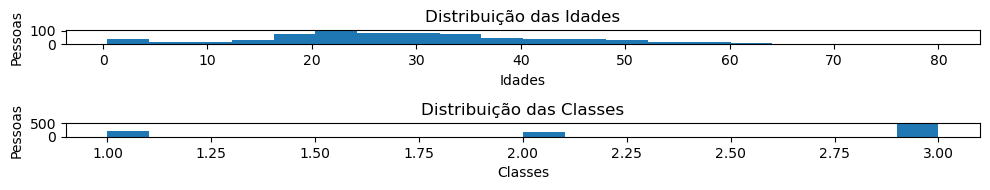

In [98]:
plt.figure(figsize=(10,2))
plt.subplot(2,1,1) # linha, coluna plot 1
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idades')

plt.subplot(2,1,2) # linha, coluna plot 1
plt.hist(data['Classe'].dropna(), bins=20)
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')

plt.tight_layout()
plt.show()

## Subplots - 2ª Forma

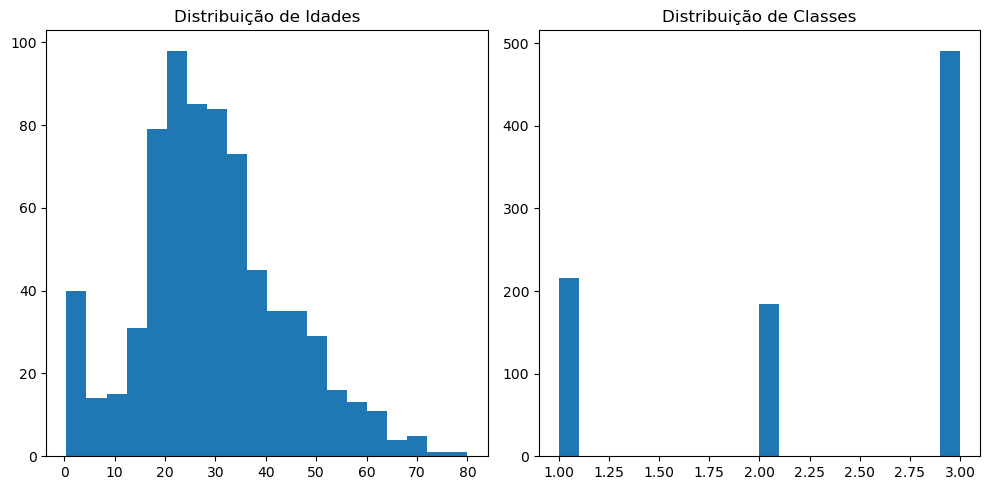

In [99]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=100) # 1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna(), bins=20)
ax[0].set_title('Distribuição de Idades')


ax[1].hist(data['Classe'].dropna(), bins=20)
ax[1].set_title('Distribuição de Classes')

plt.tight_layout()
plt.show()

## Seaborn

In [100]:
import seaborn as sns

In [101]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [102]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [103]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

## pie e countplot

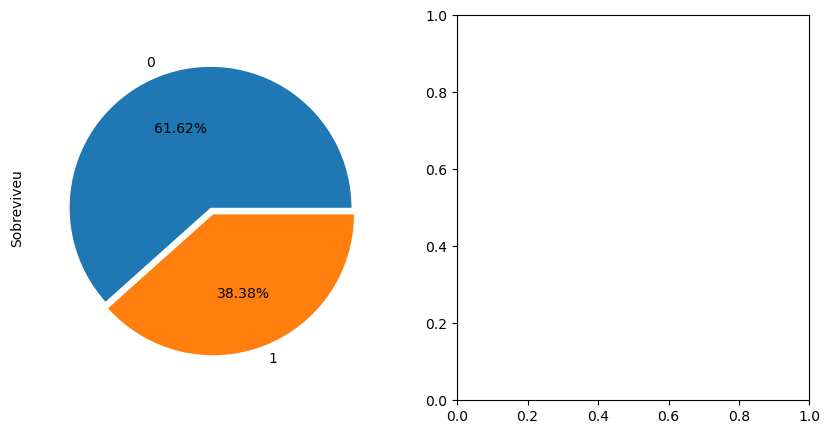

In [104]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

plt.show()

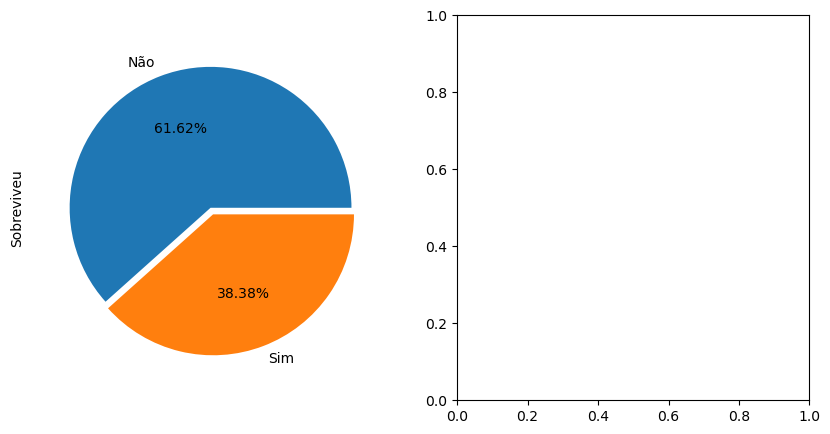

In [105]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].map({0: 'Não', 1: 'Sim'}).value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

plt.show()

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

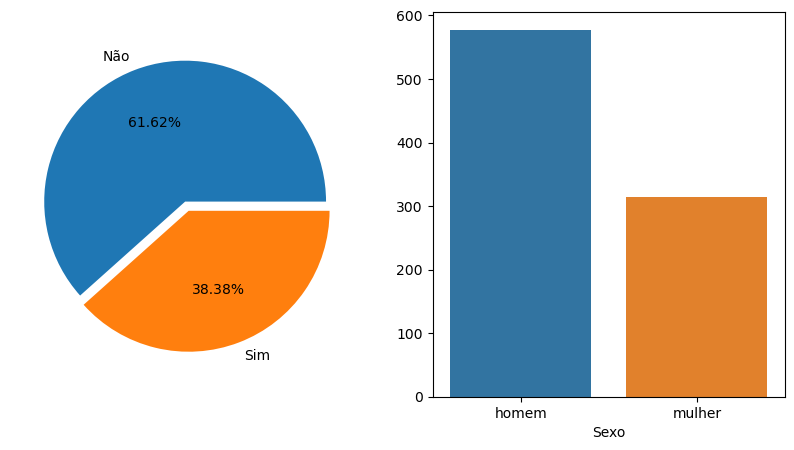

In [106]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].map({0: 'Não', 1: 'Sim'}).value_counts().plot.pie(ax=ax[0], explode=[0.02,0.05], autopct='%0.2f%%')
ax[0].set_ylabel('')

sns.countplot('Sexo', data=data, ax=ax[1])
ax[1].set_ylabel('')

## countplot e hue

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

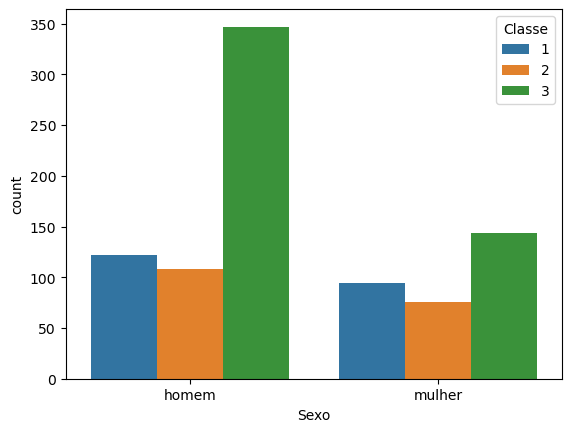

In [107]:
sns.countplot('Sexo', hue='Classe', data=data)


## boxplot

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

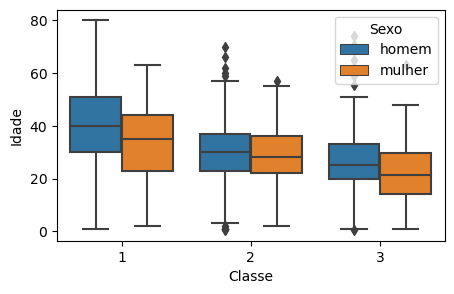

In [108]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

## violinplot

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

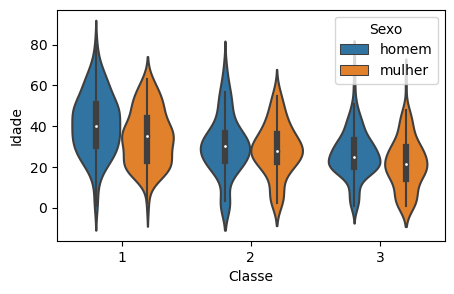

In [109]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

## Facegrid com hist

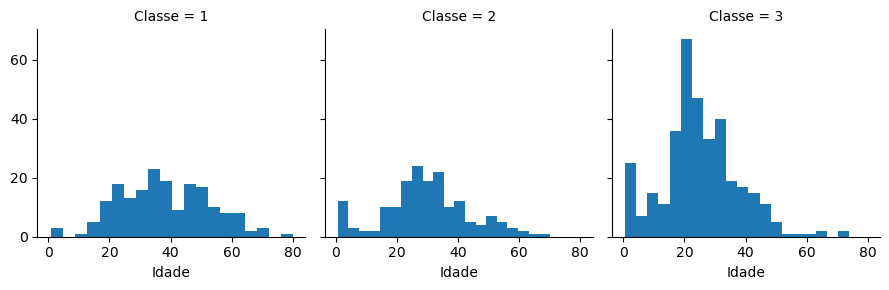

In [110]:
g = sns.FacetGrid(data, col='Classe')
g.map(plt.hist,'Idade', bins=20)

C:\Users\phill\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


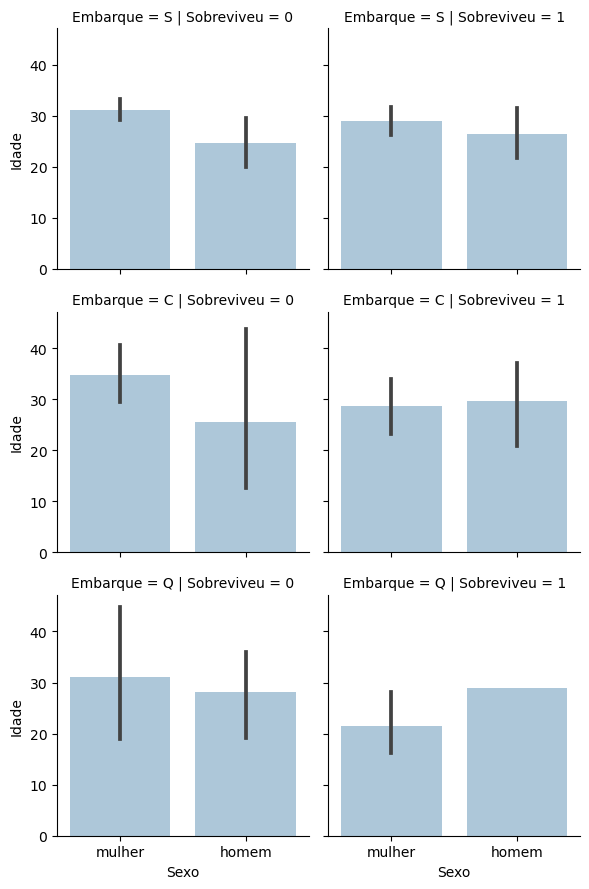

In [111]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot,'Sexo','Idade', alpha=0.4, ci=99)

C:\Users\phill\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


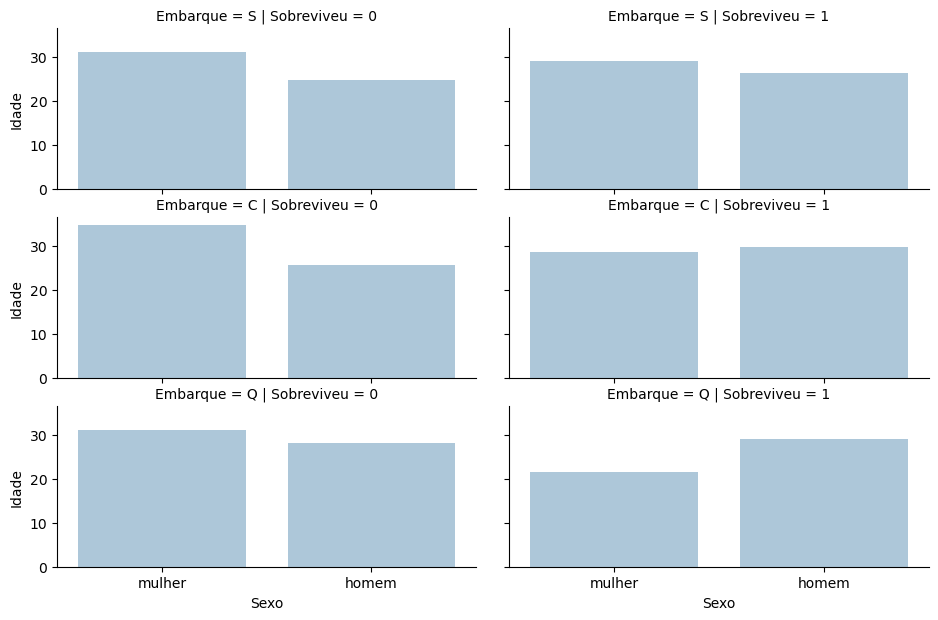

In [112]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot,'Sexo','Idade', alpha=0.4, ci=None)

fig=plt.gcf()
fig.set_size_inches(10,6)

## Facegrid com distplot

C:\Users\phill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

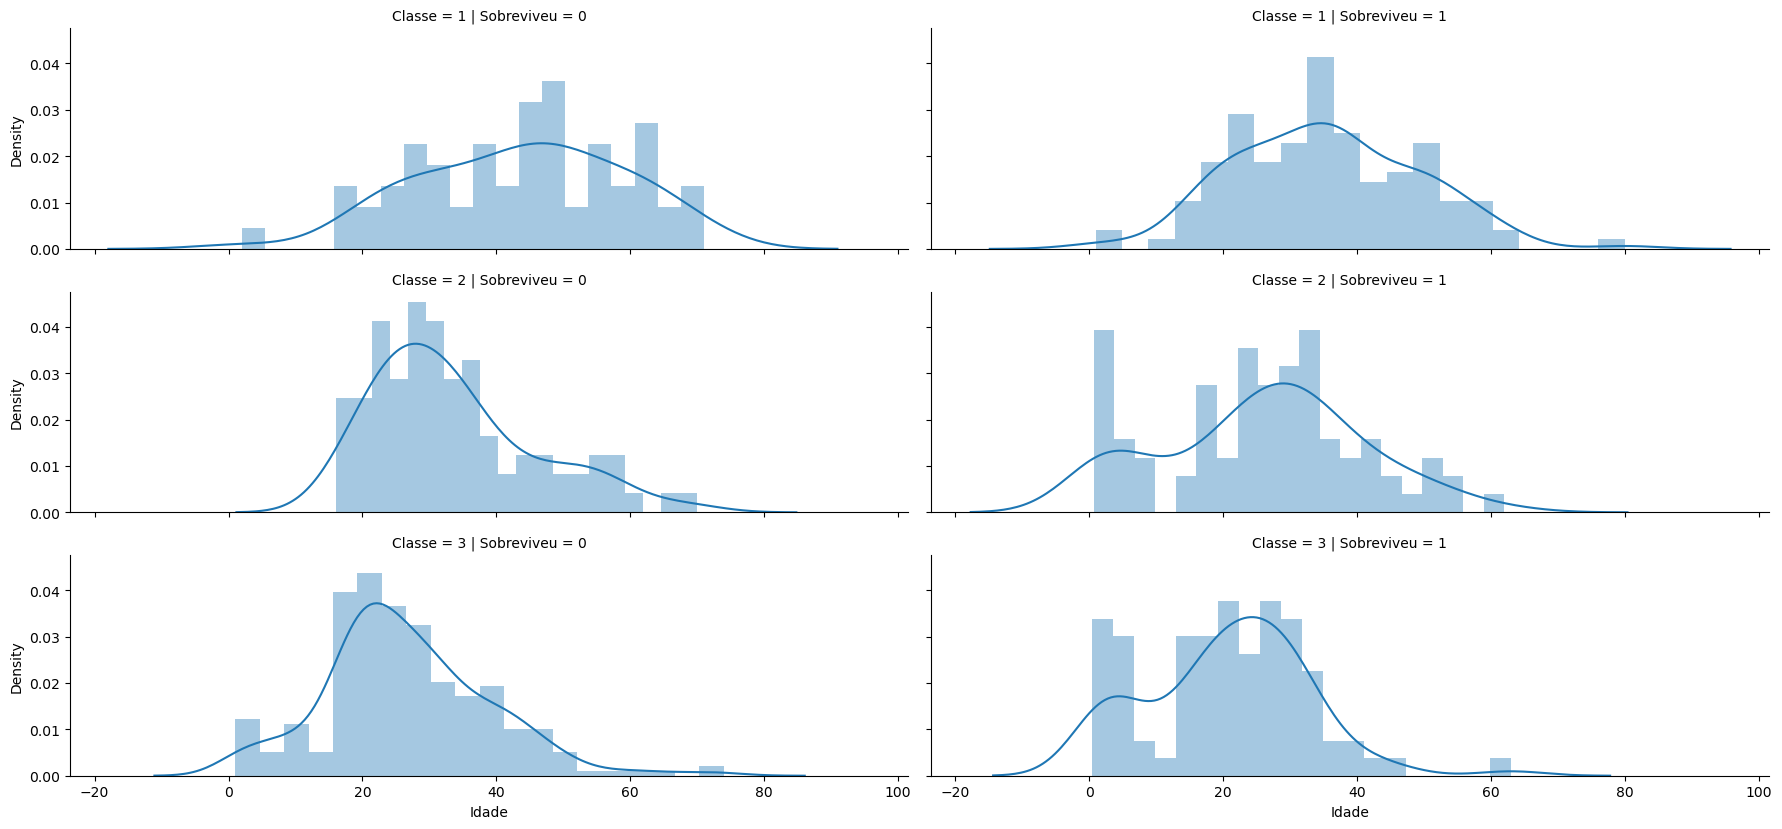

In [113]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=2.8, aspect=3.2)
g.map(sns.distplot, 'Idade', bins=20)


## catplot do tipo "point"

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


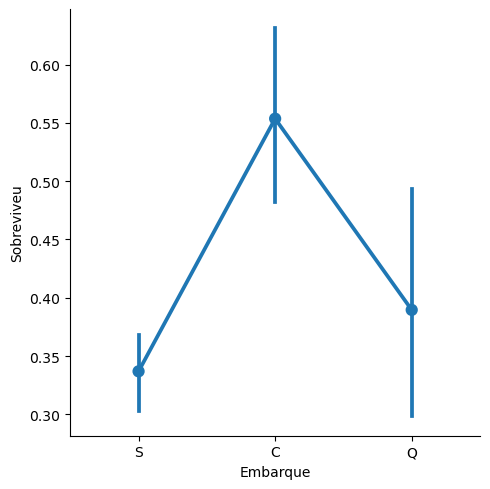

In [114]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')

In [115]:
data['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


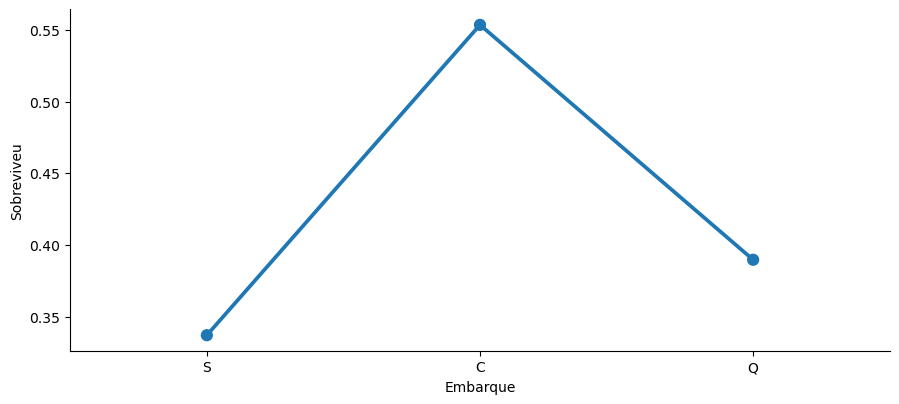

In [116]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point', ci=None)
fig=plt.gcf()
fig.set_size_inches(10,4)

# heatmap


In [117]:
data.isnull().sum()

IdPassageiro      0
Sobreviveu        0
Classe            0
Nome              0
Sexo              0
Idade           177
ImaosCOnjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Cabine          687
Embarque          2
dtype: int64

<AxesSubplot:>

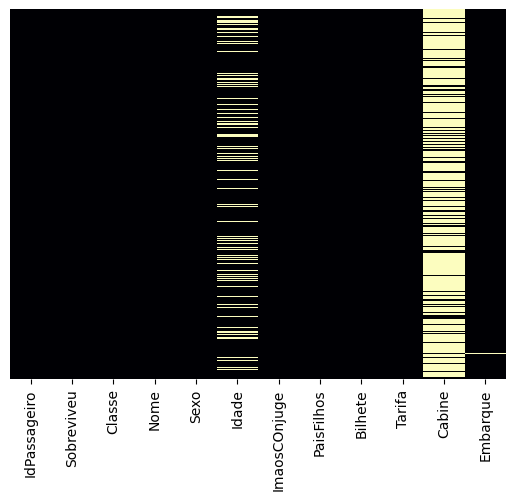

In [118]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

## relplot

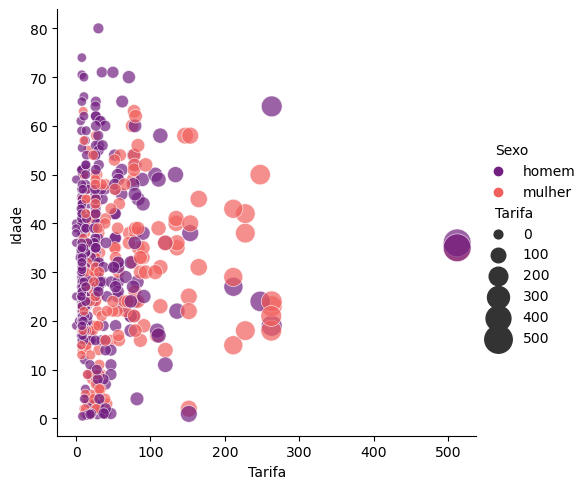

In [119]:
sns.relplot(x='Tarifa', hue='Sexo', y='Idade', data=data, size='Tarifa', sizes=(40,400), alpha=0.7, palette='magma')
plt.show()

## scatterplot



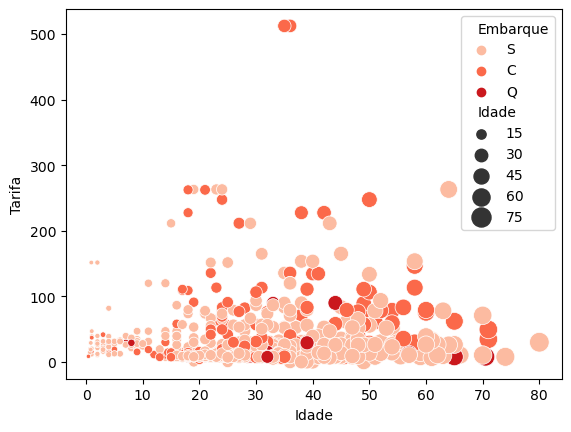

In [120]:
sns.scatterplot(x="Idade",y='Tarifa', hue='Embarque', size='Idade', palette='Reds', data=data, sizes=(10,200))
plt.show()

## pairplot


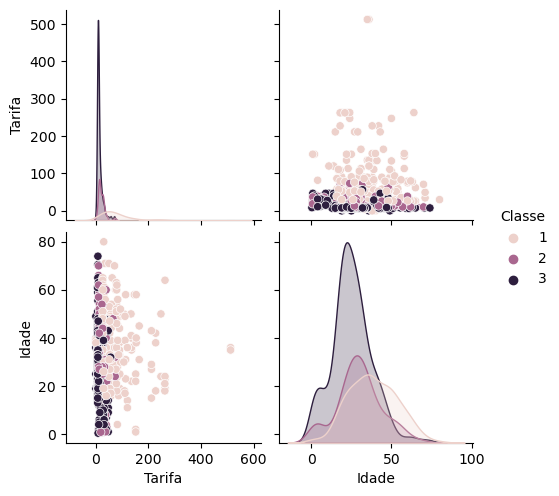

In [121]:
sns.pairplot(data[['Tarifa','Idade', 'Classe', 'Sexo', 'Embarque']], hue='Classe')


## jointpot tipo "kde"

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


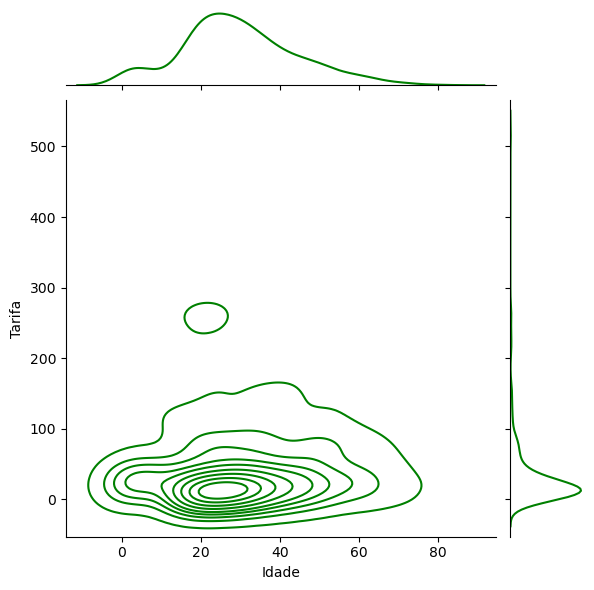

In [122]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')

## jointpot tipo "reg"

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


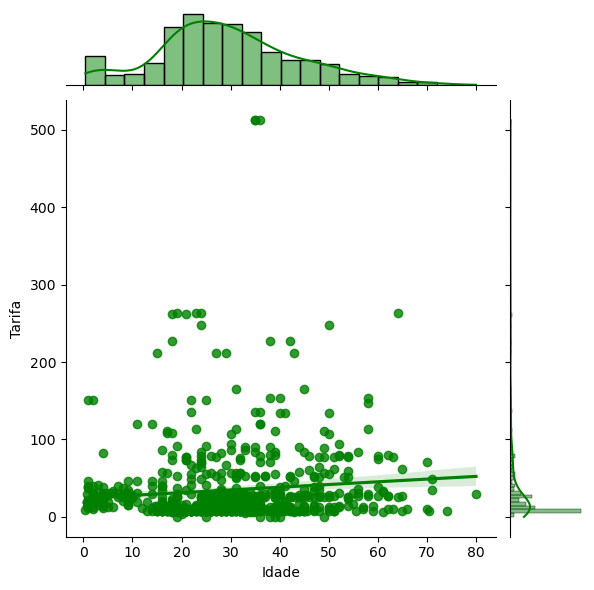

In [123]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

## kdeplot

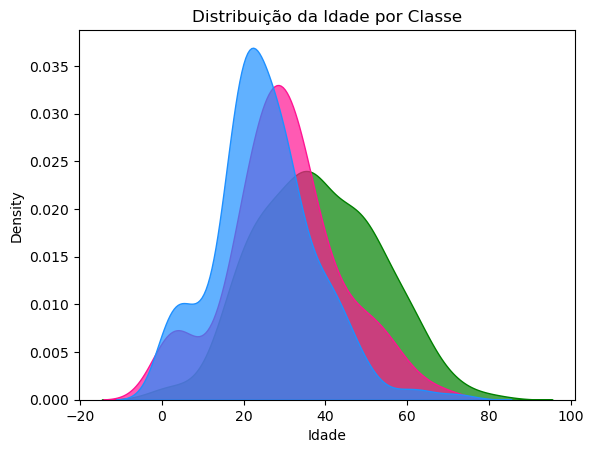

In [124]:
sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Idade por Classe')
plt.show()

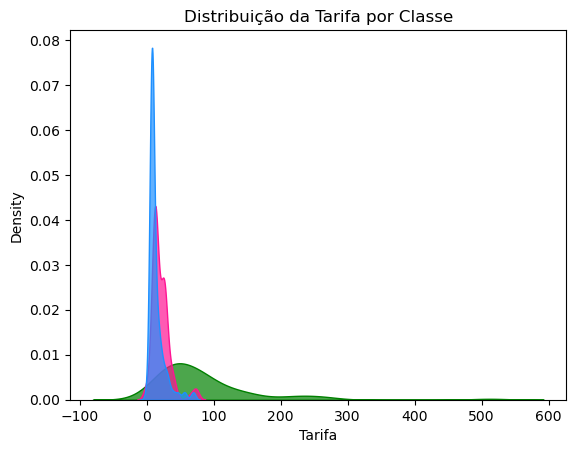

In [125]:
sns.kdeplot(data['Tarifa'].loc[data['Classe']==1], shade=True, color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==2], shade=True, color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==3], shade=True, color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

## catiplot do tipo "count"

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


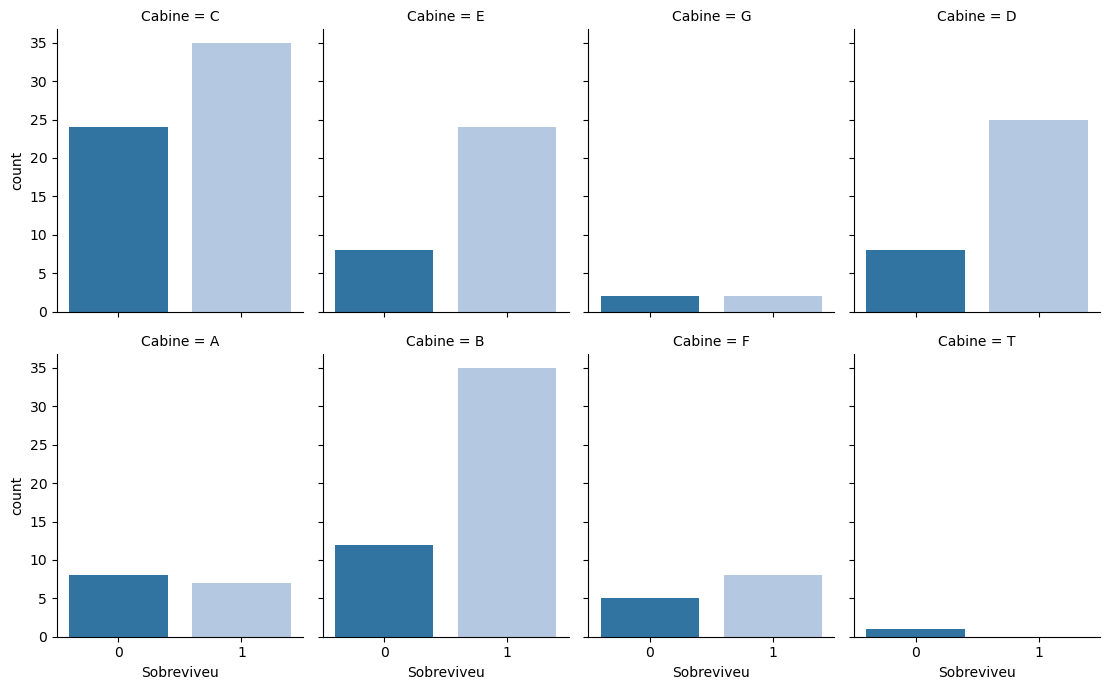

In [126]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(), 
            kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

## heatmap corr()

In [127]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q', 'Embarque_S']].corr(), cmap='Blues', annot=True)

KeyError: "['Embarque_Q', 'Embarque_S'] not in index"

<Figure size 1000x700 with 0 Axes>

In [ ]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']]

In [ ]:
data = pd.get_dummies(data=data, columns=['Embarque'], drop_first=True)

## plot


In [ ]:
x = np.random.normal(10,1,15) # criando 15 elementos | com média 10 | e desvio padrão 1

In [ ]:
len(x)

In [ ]:
plt.plot(x)

## linespace

In [ ]:
x = np.linspace(0, 20, 1000) # criando 1000 numeros igualmente
                             # espaçados num intervalo de 0 a 20

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
y = 2*x - 5 # equação do 1ª grau

In [ ]:
plt.plot(x,y)

In [ ]:
y = 2*x**2 - 5*x + 3 # equação do 2ª grau

In [ ]:
plt.plot(x,y)

In [ ]:
y = 9*x**3 - 5*x + 3 # equação do 3ª grau
plt.plot(x,y)

In [ ]:
y = 9*x**4 - 5*x + 3 # equação do 4ª grau
plt.plot(x,y)

In [ ]:
y = 9*x**4 - 5*x + 3 # equação do 4ª grau
plt.plot(x,y, label='Plot 1')
plt.plot(x*2,y, label='Plot 2')

plt.legend()
plt.show()

In [ ]:
y = np.random.normal(8,2,1000) # criando 1000 elementos normalmente distribuidos
                             # com uma média de 8 | e um desvio padrão de 2

In [ ]:
sns.distplot(y)
plt.show()

## normal

In [ ]:
y = np.random.normal(8,2,1000) # criando 1000 elementos normalmente distribuidos
                               # com uma média de 8 | e um desvio padrão de 2

In [ ]:
plt.hist(y)
plt.show()

C:\Users\phill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

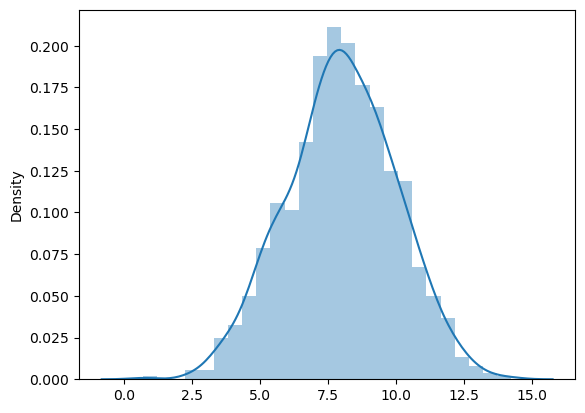

In [128]:
sns.distplot(y)

In [129]:
plt.show()